Vandebron Tecnical Assessment - Data Scientist Trading  

Code deliverables:  
1. Backward looking optimal steering algorithm & total revenue
2. State of charge & imbalance position for each step

Content of repo:
- 'main' contains the code deliverables and explanation
- 'utils' contains some helper & plotting functions
- 'steering_algorithms' specifically contains the three steering algorithms I wrote, among which the optimal, backward-looking approach
- 'imbalance_prices' contains the data
- 'requirements' can be used to run this code in a venv

Job Scheltema, 15-09-2025

In [ ]:
# Import some libraries and the data
import pandas as pd
from utils import soc_to_idx, idx_to_soc, check_for_dual_pricing, plot_prices, plot_battery_strategy
from steering_algorithms import dynamic_programming_backwards_walkthrough, naive_greedy_algorithm, holdout_phase_of_day_algorithm
import numpy as np

df = pd.read_csv('imbalance_prices.csv')
df = df.rename(columns={'START_DATETIME_UTC':'t', 'IMBALANCE_LONG_EUR_MWH':'long', 'IMBALANCE_SHORT_EUR_MWH':'short'})
df = check_for_dual_pricing(df)

df

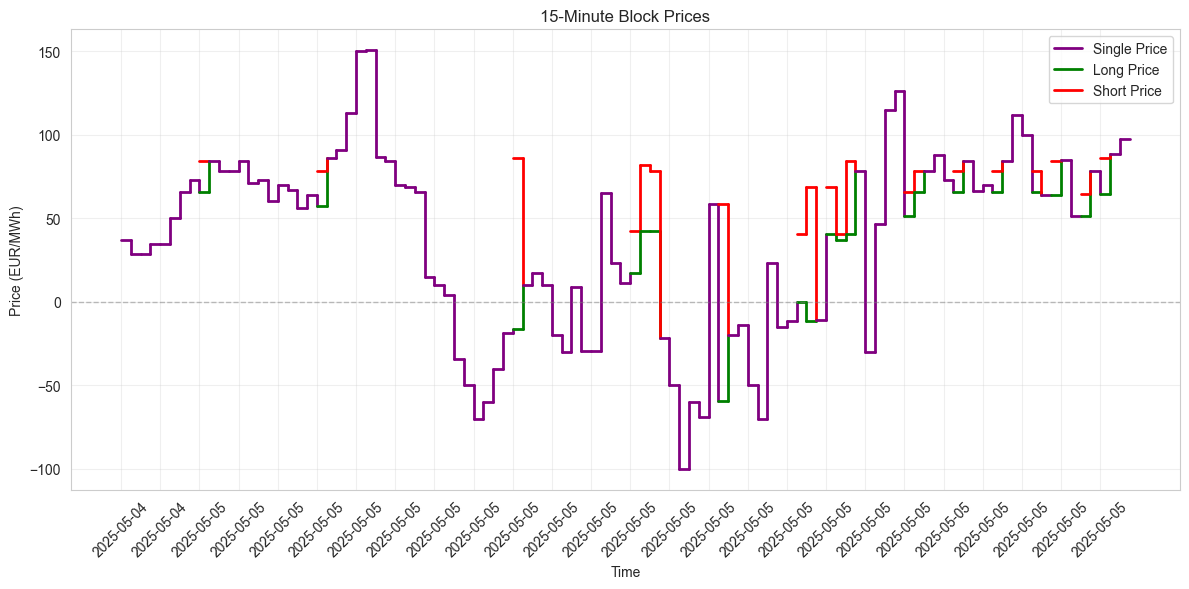

In [ ]:
# Quick visualisation to get a feeling for the data
day = 1

dff = df[:104+((day-1)*96)].copy().reset_index(drop=True)
plot_prices(dff)

Below we calculate trading revenue with 3 different steering algorithms. 

I will first provide the concrete deliverables for our optimal steering algorithm. 

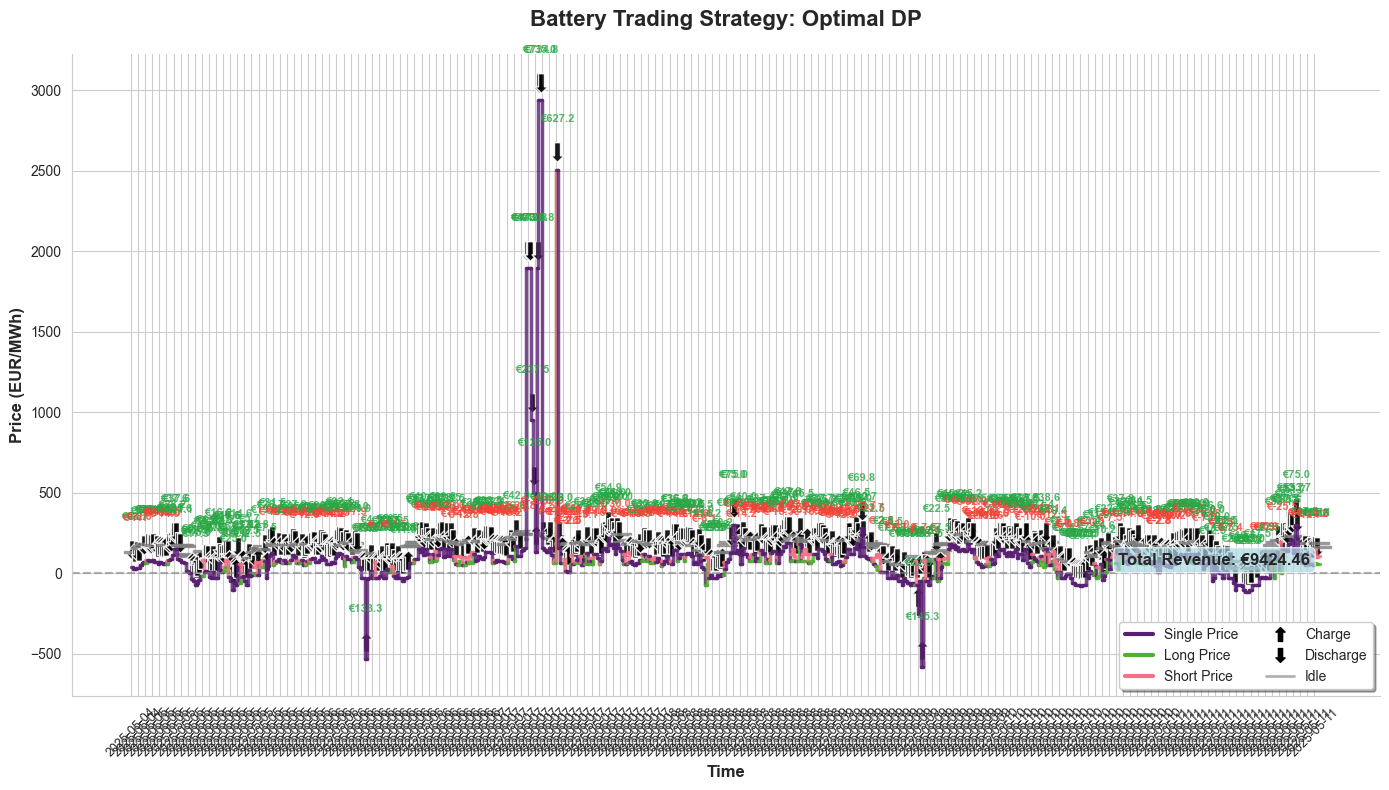

In [66]:
# Optimal backwards walk
action_sequence, revenue_per_action, total_revenue, soc_development = dynamic_programming_backwards_walkthrough(df)
plot_battery_strategy(df, "Optimal DP", action_sequence, revenue_per_action)

In [77]:
# We assume initial state-of-charge is full capacity, so 2MWh. However, the function takes this as an argument, so this is dynamic.

# Optimal steering algorithm - note that this is from the perspective of the grid, so +1 is discharging and -1 is charging the battery.
action_sequence

# Total potential revenue
total_revenue

# State of charge development per PTU
soc_development

# Imbalance positions per PTU 
[i * 0.25 for i in action_sequence]

[np.float64(0.25),
 np.float64(0.0),
 np.float64(-0.25),
 np.float64(0.25),
 np.float64(-0.25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(0.0),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(0.25),
 np.float64(-0.25),
 np.float64(-0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.float64(0.25),
 np.floa

I had already completed this code before receiving the clarification on the assessment's objective, so I've left it in. It could potentially serve as a starting point for discussion on Wednesday. 

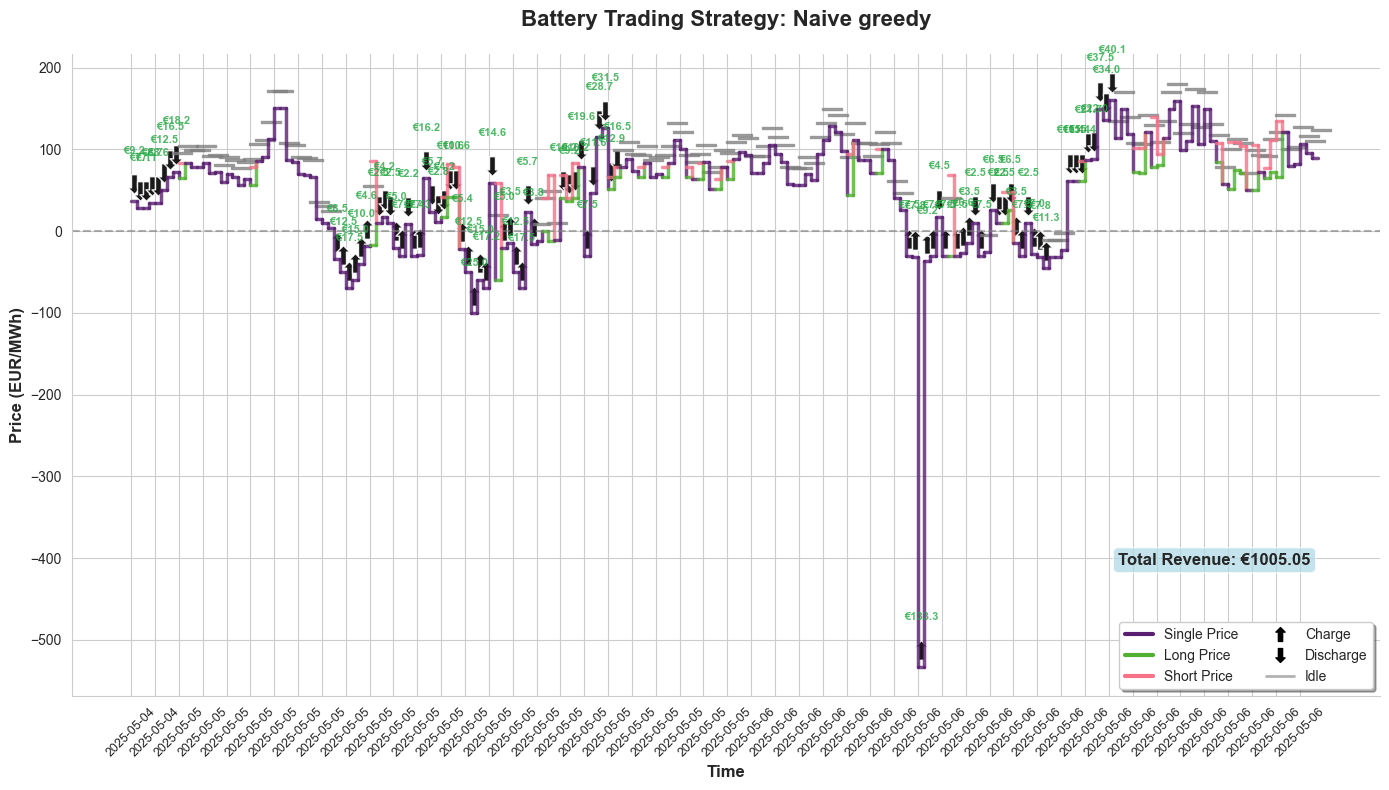

In [ ]:
# Naive-greedy algorithm as comparative baseline
action_sequence, revenue_per_action, total_revenue, soc_development = naive_greedy_algorithm(df)
plot_battery_strategy(df, "Naive greedy", action_sequence, revenue_per_action)

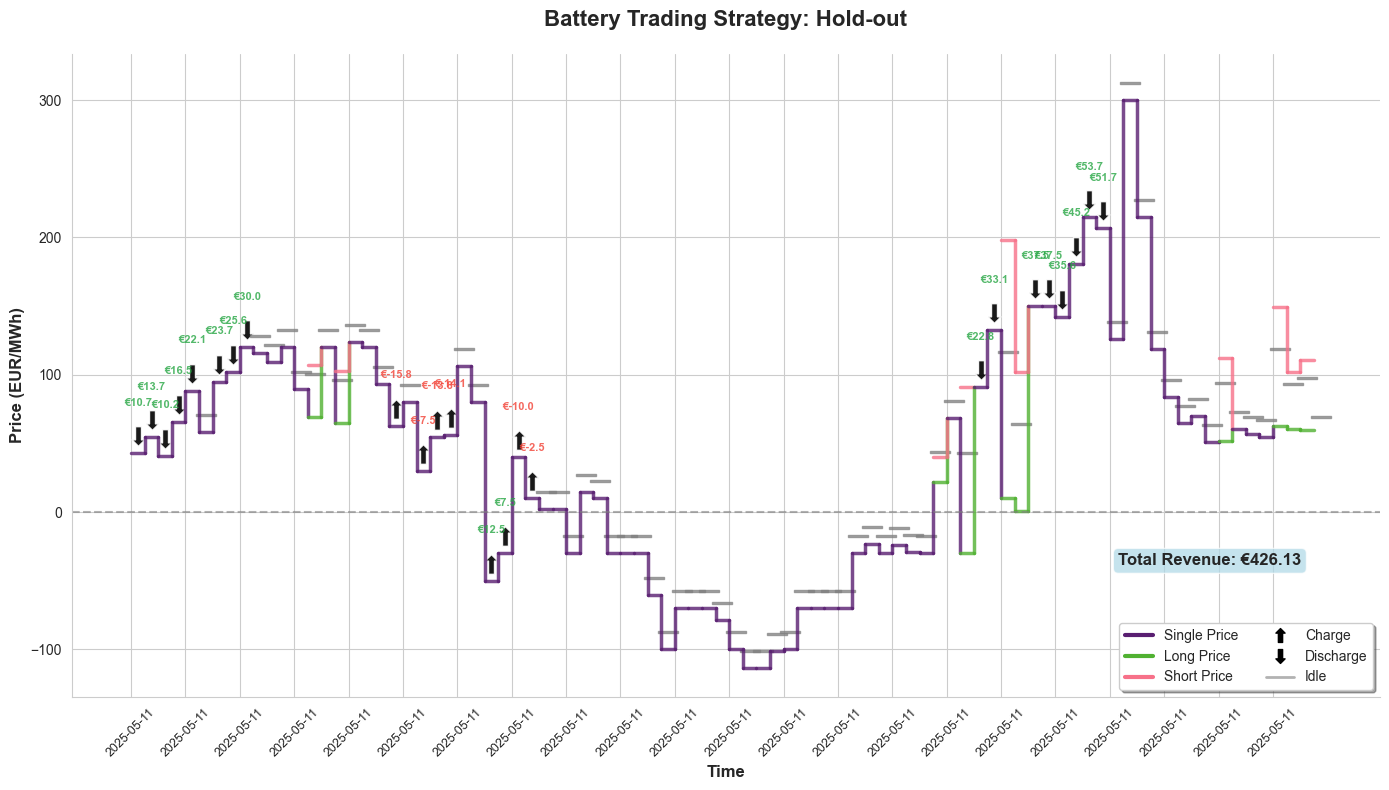

In [ ]:
# Simple 'intelligent' strategy that should outperform the baseline
action_sequence, revenue_per_action, total_revenue, soc_development = holdout_phase_of_day_algorithm(df)
plot_battery_strategy(df, "Hold-out", action_sequence, revenue_per_action)

In [79]:
# Comparison of custom algorithm with baseline, does it outperform the naive-greedy approach?

# Use the same data as your direct calls
dff = df[:].copy().reset_index(drop=True)

print("Week Performance Comparison - Cumulative Learning")
print("=" * 60)

# Store cumulative revenues to calculate daily differences
prev_holdout_total = 0
prev_naive_total = 0

for day in range(1, 8):  # Days 1 through 7
    # Take data through current day
    data_through_day = dff.iloc[:(day * 96)].copy()
    
    # Run both algorithms on all data through current day
    _, _, holdout_total, _ = holdout_phase_of_day_algorithm(data_through_day)
    _, _, naive_total, _ = naive_greedy_algorithm(data_through_day)
    
    # Calculate daily revenues (subtract previous cumulative)
    daily_holdout = holdout_total - prev_holdout_total
    daily_naive = naive_total - prev_naive_total
    daily_diff = daily_holdout - daily_naive
    
    print(f"Day {day}:")
    print(f"  Holdout Algorithm: €{daily_holdout:.2f}")
    print(f"  Naive Greedy:      €{daily_naive:.2f}")
    print(f"  Daily Difference:  €{daily_diff:.2f}")
    print(f"  Cumulative Total:  €{holdout_total:.2f} vs €{naive_total:.2f}")
    print()
    
    # Update for next iteration
    prev_holdout_total = holdout_total
    prev_naive_total = naive_total

print(f"Final totals:")
print(f"Holdout: €{prev_holdout_total:.2f}")
print(f"Naive:   €{prev_naive_total:.2f}")
print(f"Improvement: €{prev_holdout_total - prev_naive_total:.2f}")

Week Performance Comparison - Cumulative Learning
Day 1:
  Holdout Algorithm: €369.24
  Naive Greedy:      €540.93
  Daily Difference:  €-171.69
  Cumulative Total:  €369.24 vs €540.93

Day 2:
  Holdout Algorithm: €341.61
  Naive Greedy:      €464.12
  Daily Difference:  €-122.50
  Cumulative Total:  €710.86 vs €1005.05

Day 3:
  Holdout Algorithm: €19.88
  Naive Greedy:      €0.00
  Daily Difference:  €19.88
  Cumulative Total:  €730.74 vs €1005.05

Day 4:
  Holdout Algorithm: €517.29
  Naive Greedy:      €335.56
  Daily Difference:  €181.73
  Cumulative Total:  €1248.03 vs €1340.61

Day 5:
  Holdout Algorithm: €425.53
  Naive Greedy:      €342.11
  Daily Difference:  €83.43
  Cumulative Total:  €1673.56 vs €1682.71

Day 6:
  Holdout Algorithm: €381.14
  Naive Greedy:      €193.98
  Daily Difference:  €187.15
  Cumulative Total:  €2054.70 vs €1876.69

Day 7:
  Holdout Algorithm: €329.18
  Naive Greedy:      €314.66
  Daily Difference:  €14.52
  Cumulative Total:  €2383.88 vs €2191.35
